In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering

## K-means

The scikit-learn library has an implementation of the k-means algorithm. Let’s apply it to a set of randomly generated blobs, whose labels we throw away. 

make_blobs() function generates a data set for clustering. Investigate the shape of the X https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

__TO DO__: Find out how many instances with how many features were generated.

In [0]:
# Task
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42) 
print(X.shape)

(100, 2)


Plot the points X with a scatter plot

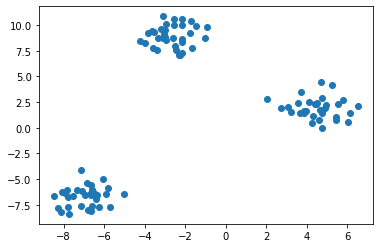

In [0]:
plt.scatter(X[:,0],X[:,1]);

In this toy example you can guess the number of clusters. Let’s see if the k-means algorithm can recover these clusters. 

__TO DO__: Import KMeans and create the instance of the k-means model by giving it the number of clusters 3 as a hyperparameter. Fit the model to your dataset X. Notice that we do not feed labels y into the model. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [0]:
# Task
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(X)

Out[4]: KMeans(n_clusters=3)

__TO DO__: assign centroids to the variable centroids and print it. Use KMeans model's attribute cluster_centers_. 

- The centroids are important because they are what enables KMeans to assign new, previously unseen points to the existing clusters

In [0]:
# Task
centroids = model.cluster_centers_
print(centroids)

[[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]]


__TO DO__: assign predicted class labels to the variable labels and print it. Use KMeans model's attribute labels_

In [0]:
# Task
labels = model.labels_
print(labels)

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


Plot the points X with a scatter plot with colors equal to labels. The centroids are plotted with a red dot.

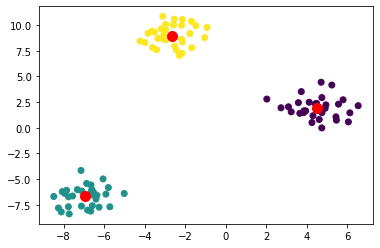

In [0]:
plt.scatter(X[:,0],X[:,1], c=labels);
plt.scatter(centroids[:,0], centroids[:,1], s=100, color="red"); # Show the centres

__TO DO__: return KMeans' performance measure inertia  with an attribute inertia_

- inertia = Sum of squared distances of samples to their closest cluster center. The lower the inertia the better.

In [0]:
# Task
model.inertia_

Out[8]: 171.91098459057724

Select the number of clusters where inertia does not decrease significantly anymore = Elbow rule.

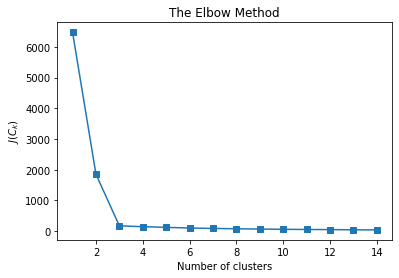

In [0]:
inertia = []
for k in range(1, 15):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(km.inertia_)
    
plt.plot(range(1, 15), inertia, marker='s');
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('$J(C_k)$');

__TO DO__: Use the .predict() method of model to predict the cluster labels of new_points. Assign them to variable named new_labels. Notice that KMeans can assign previously unseen points to the clusters it has already found!

[2 1 0 2]


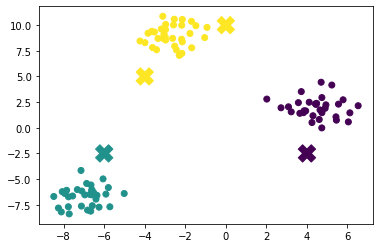

In [0]:
# Task
new_points = np.array([[-4, 5], [-6, -2.5], [4, -2.5], [0, 10]])
new_labels = np.array(model.predict(new_points))
print(new_labels)

plt.scatter(X[:,0],X[:,1], c=labels)
plt.scatter(new_points[:,0], new_points[:,1], c=new_labels, marker = 'X', s = 300);

### Scaling, numerical variables

Read the data set below.

In [0]:
# https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
customers = pd.read_csv('../data/Mall_Customers.csv')
customers.set_index('CustomerID', inplace = True)
customers['Annual Income (k$)'] = customers['Annual Income (k$)']*1000
customers.columns = ['gender', 'age', 'annual_income_$', 'spending_score']
display(customers.head(5))
print(customers.shape)

gender,age,annual_income_$,spending_score
Male,19,15000,39
Male,21,15000,81
Female,20,16000,6
Female,23,16000,77
Female,31,17000,40


(200, 4)


Annual income has a very different scale than other two numerical features. 

For distance based methods scaling helps if the features have very different scales. We will scale here all numerical features with StandardScaler(). It standardizes features by removing the mean and scales to unit variance

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = customers.select_dtypes(exclude='object').columns # get numerical columns
customers[num_cols] = scaler.fit_transform(customers[num_cols]) # apply scaler to numerical columns
customers.head()

,gender,age,annual_income_$,spending_score
CustomerID,,,,
1,Male,-1.424569,-1.738999,-0.434801
2,Male,-1.281035,-1.738999,1.195704
3,Female,-1.352802,-1.700830,-1.715913
4,Female,-1.137502,-1.700830,1.040418
5,Female,-0.563369,-1.662660,-0.395980


In [0]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           200 non-null    object 
 1   age              200 non-null    float64
 2   annual_income_$  200 non-null    float64
 3   spending_score   200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


__TO DO__: fit the KMeans() model to the customers dataset. **You will get an error**. Don't worry, this one is on purpose. Proceed with the next cell after the error.

In [0]:
# Task
KMeans(n_clusters=2, random_state=42).fit(customers)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<command-2649658360540165> in <cell line: 2>()
      1 # Task
----> 2 KMeans(n_clusters=2, random_state=42).fit(customers)

/databricks/python/lib/python3.9/site-packages/mlflow/utils/autologging_utils/safety.py in safe_patch_function(*args, **kwargs)
    555                         patch_function.call(call_original, *args, **kwargs)
    556                     else:
--> 557                         patch_function(call_original, *args, **kwargs)
    558 
    559                     session.state = "succeeded"

/databricks/python/lib/python3.9/site-packages/mlflow/utils/autologging_utils/safety.py in patch_with_managed_run(original, *args, **kwargs)
    254 
    255             try:
--> 256                 result = patch_function(original, *args, **kwargs)
    257             except (Exception, KeyboardInterrupt):
    258                 

What is the problem here? We have to transform non-numerical columns to numerical ones as it is not possible to calculate a distance between non-numerical features.

In [0]:
# use get_dummies from pandas to encode values from non-numerical columnns to numerical
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
customers = pd.get_dummies(customers, drop_first=True)

__TO DO__: Fit the KMeans model again to the customers data

In [0]:
# Task
KMeans().fit(customers).labels_

Out[16]: array([3, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 0, 7, 5, 3,
       5, 7, 6, 3, 3, 3, 6, 3, 3, 0, 6, 6, 6, 0, 3, 0, 0, 3, 0, 6, 0, 3,
       6, 0, 3, 3, 0, 6, 0, 0, 0, 3, 6, 6, 3, 6, 0, 6, 0, 6, 3, 6, 6, 3,
       3, 6, 0, 3, 6, 6, 3, 3, 6, 3, 6, 3, 3, 6, 0, 3, 6, 3, 0, 0, 0, 0,
       0, 3, 6, 3, 3, 3, 0, 6, 6, 6, 3, 6, 6, 1, 3, 1, 6, 1, 4, 1, 4, 1,
       3, 1, 2, 1, 4, 1, 2, 1, 4, 1, 3, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 2, 1, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 2, 1, 2, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       2, 1], dtype=int32)

## DBSCAN  
#### This part is voluntary. Do it if you have managed to finish the first part before the time limit  

Density-Based Spatial Clustering of Applications with Noise. The algorithm finds core samples of high density and expands clusters from them. It is good for data which contain clusters of similar density.

In [0]:
from sklearn.cluster import DBSCAN
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

Import dataset and plot it. Clearly there should be two clusters

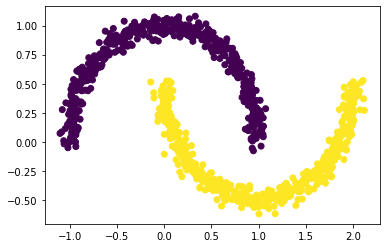

In [0]:
x_moons, y_moons = datasets.make_moons(n_samples=1000, noise=0.05,random_state=42)
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=y_moons);

KMeans fails to find appropriate clusters as it searches for convex shapes. See below.

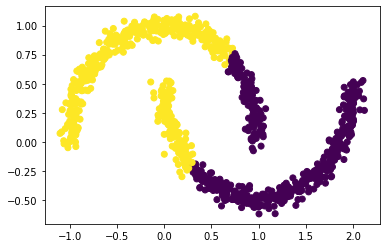

In [0]:
kmeans_labels = KMeans(2).fit(x_moons).labels_
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=kmeans_labels);

__TO DO__: Initiate DBSCAN, assign to dbscan variable and fit the model with eps=0.05 and min_samples=5.

In [0]:
# Task
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x_moons)

Out[20]: DBSCAN(eps=0.05)

__TO DO__: Return labels of dbscan with an attribute labels_ and assign the labels to dbscan_labels variable

In [0]:
# Task
dbscan_labels = dbscan.labels_
dbscan_labels

Out[21]: array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  

Notice that there are labels = -1. These denote outliers

In [0]:
unique, counts = np.unique(dbscan_labels, return_counts=True)
display(pd.DataFrame(np.asarray((unique, counts)).T, columns = ['labels', 'frequency']))

labels,frequency
-1,77
0,186
1,77
2,271
3,125
4,104
5,96
6,64


The clusters and outliers on a plot

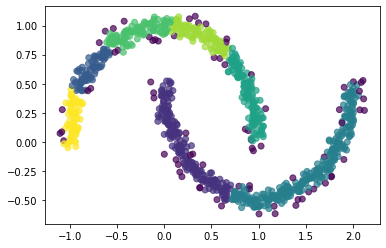

In [0]:
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=dbscan_labels, alpha=0.7);

__TO DO__: indices of the core instances are available in the core_sample_indices_ attribute. Assign them to comps_idx variable

In [0]:
# Task
comps_idx = dbscan.core_sample_indices_

The core instances are stored in the components_ attribute. Below we create a mask for indices which are core instances

In [0]:
print(dbscan.components_)

comps_idx_boolean = np.array([(i in comps_idx) for i in range(len(x_moons))]) # this creates a boolean mask for core instances 

[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


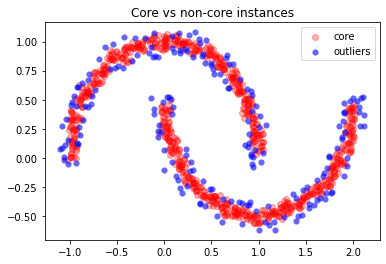

In [0]:
plt.scatter(x_moons[comps_idx_boolean, 0], x_moons[comps_idx_boolean, 1], c='r', alpha=0.3, label='core')
plt.scatter(x_moons[~comps_idx_boolean, 0], x_moons[~comps_idx_boolean, 1], c='b', alpha=0.6, linewidths = 0.1, label='outliers')
plt.legend()
plt.title('Core vs non-core instances');

The DBSCAN clustering did not return expected results. Let's try different eps and min_samples

__TO DO__: fit DBSCAN again with eps=0.2 and min_samples=5. Plot the resulting clusters

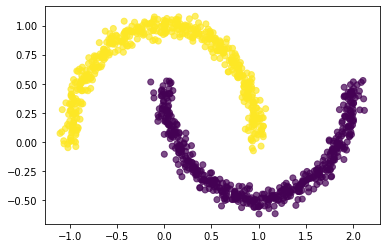

In [0]:
# Task
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(x_moons)
dbscan_labels = dbscan.labels_
plt.scatter(x_moons[:, 0], x_moons[:, 1], c=dbscan_labels, alpha=0.7);

**Notice that DBSCAN class does not have .predict() method**, although it has a fit_predict() method. It cannot predict a cluster for a new instance

In [0]:
dbscan.predict(x_moons)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<command-2649658360540340> in <cell line: 1>()
----> 1 dbscan.predict(x_moons)

AttributeError: 'DBSCAN' object has no attribute 'predict'

Some material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science)